# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dian Pandu Syahfitra
- **Email:** mc006d5y1822@student.devacademy.id
- **ID Dicoding:** MC006D5Y1822

## Menentukan Pertanyaan Bisnis

1. Produk atau kategori produk apa yang paling laris?- 
2. Bagaimana tren penjualan dari waktu ke waktu? Apakah ada musiman atau pola tertentu?
3. Wilayah mana yang memberikan kontribusi pelanggan tertinggi?
4. Metode pembayaran apa yang paling populer?
5. Produk apa saja yang memiliki revenue tertinggi?

## Import Semua Packages/Library yang Digunakan

In [101]:
import numpy as np 
import pandas as pd 
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [102]:
#Load dataset
customers = pd.read_csv("customers_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
products = pd.read_csv("products_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")
geolocation = pd.read_csv("geolocation_dataset.csv")
payments = pd.read_csv("order_payments_dataset.csv")
reviews = pd.read_csv("order_reviews_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

In [103]:
# Dataset Utama: Transaksi
main_data = pd.merge(orders, customers, on='customer_id', how='left')
main_data = pd.merge(main_data, order_items, on='order_id', how='left')
main_data = pd.merge(main_data, products, on='product_id', how='left')
main_data = pd.merge(main_data, payments, on='order_id', how='left')
main_data = pd.merge(main_data, sellers, on='seller_id', how='left')

**Insight:**
Pada project ini saya hanya akan menggunakan beberapa dataset untuk dianalisis, yaitu menggabungkan dataset utama (main_data) yang terdiri dari orders, customers, order_items, products, dan payments akan mendapatkan gambaran lengkap tentang transaksi e-commerce. Dataset ini memungkinkan untuk menganalisis hubungan antara pelanggan, produk, dan metode pembayaran. Dengan dataset yang sudah digabungkan, akan dapat menjawab pertanyaan bisnis yang ditentukan dan mendapatkan insight yang mendalam tentang performa bisnis, preferensi pelanggan, dan strategi pemasaran.

### Assessing Data

In [104]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   customer_unique_id             118434 non-null  object 
 9   customer_zip_code_prefix       118434 non-null  int64  
 10  customer_city                  118434 non-null  object 
 11  customer_state                 118434 non-null  object 
 12  order_item_id                 

In [105]:
main_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
product_category_name            2528
product_name_lenght              2528
product_description_lenght       2528
product_photos_qty               2528
product_weight_g                  850
product_length_cm                 850
product_height_cm                 850
product_width_cm                  850
payment_sequ

In [106]:
main_data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,118434.000000,117604.000000,117604.000000,117604.000000,115906.000000,115906.000000,115906.000000,117584.000000,117584.000000,117584.00000,117584.000000,118431.000000,118431.000000,118431.000000,117604.000000
mean,35034.264392,1.195920,120.822849,20.045551,48.767208,786.957302,2.207849,2114.281067,30.256872,16.63029,23.068394,1.094207,2.937398,172.849395,24442.886483
std,29819.290218,0.697721,184.477367,15.861351,10.035162,653.029009,1.719519,3788.754048,16.190874,13.45878,11.748372,0.728290,2.774164,268.259831,27573.802989
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.00000,15.000000,1.000000,1.000000,60.860000,6429.000000
50%,24240.000000,1.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000,1.000000,2.000000,108.200000,13660.000000
75%,58464.500000,1.000000,134.900000,21.190000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000,1.000000,4.000000,189.245000,28035.000000
max,99990.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [107]:
main_data.duplicated().sum()

0

In [108]:
# Cek Outlier pada fitur numerik
numeric_features = main_data.select_dtypes(include=['float64', 'int64'])

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Cek outlier untuk setiap kolom numerik
for column in numeric_features:
    outliers = detect_outliers_iqr(main_data, column)
    print(f"Outliers in {column}: {len(outliers)}")

Outliers in customer_zip_code_prefix: 0
Outliers in order_item_id: 14547
Outliers in price: 8844
Outliers in freight_value: 12683
Outliers in product_name_lenght: 802
Outliers in product_description_lenght: 7336
Outliers in product_photos_qty: 3198
Outliers in product_weight_g: 16630
Outliers in product_length_cm: 3805
Outliers in product_height_cm: 8066
Outliers in product_width_cm: 2740
Outliers in payment_sequential: 5099
Outliers in payment_installments: 8066
Outliers in payment_value: 9580
Outliers in seller_zip_code_prefix: 18099


### Insight

#### 1. Cek Missing Value
1. **Kolom Waktu**  
   - Kolom: `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`  
   - **Kemungkinan Penyebab**: Pesanan yang belum disetujui atau belum dikirim.  
   - **Penanganan**: Missing values akan dihapus dikarenakan hanya sedikit data yang hilang dan tidak akan mempengaruhi hasil

2. **Kolom Produk**  
   - Kolom: `product_category_name`, `product_name_length`, dll.  
   - **Kemungkinan Penyebab**: Data produk yang tidak lengkap.  
   - **Penanganan**: Missing values akan dihapus dikarenakan hanya sedikit data yang hilang dan tidak akan mempengaruhi hasil
   
3. **Kolom Pembayaran**  
   - Kolom: `payment_sequential`, dll.  
   - **Kemungkinan Penyebab**: Transaksi yang belum selesai atau data yang tidak tercatat.  
   - **Penanganan**: Baris dengan missing values pada kolom pembayaran dapat dipertimbangkan untuk dihapus karena jumlahnya relatif kecil.

---

#### 2. Cek Data Duplicate
- **Hasil**: Dataset ini bersih dari duplikasi, yang menunjukkan kualitas data yang baik.

---

#### 3. Cek Outliers
1. **Kolom Transaksi**  
   - Kolom: `price`, `freight_value`, `payment_value`.  
   - **Deskripsi**: Outlier mungkin mencerminkan transaksi dengan nilai yang sangat tinggi atau rendah.

2. **Kolom Produk**  
   - Kolom: `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`.  
   - **Deskripsi**: Outlier mungkin mencerminkan produk dengan ukuran atau berat yang tidak biasa.

3. **Kolom Lainnya**  
   - Kolom: `order_item_id`, `payment_installments`.  
   - **Deskripsi**: Outlier mungkin mencerminkan pesanan dengan jumlah item atau cicilan yang tidak biasa.

**Keputusan**:  
Outlier akan dibiarkan karena mencerminkan variasi alami dalam transaksi e-commerce (misalnya, produk dengan harga tinggi, berat yang tidak biasa, atau jumlah cicilan yang berbeda). Mempertahankan outlier penting untuk menjaga keaslian data.


### Cleaning Data

In [109]:
# Hapus baris dengan missing values pada kolom yang relevan
main_data.dropna(
    subset=[
        'order_approved_at', 
        'order_delivered_carrier_date', 
        'order_delivered_customer_date', 
        'product_category_name',
        'product_name_lenght',
        'product_description_lenght',
        'product_photos_qty',
        'product_weight_g',
        'product_length_cm',
        'product_height_cm',
        'product_width_cm',
        'payment_sequential',
        'payment_type',
        'payment_installments',
        'payment_value'
    ],
    inplace=True
)

In [110]:
main_data.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments

**Insight:**

Dengan menghapus baris yang memiliki missing values, dataset sekarang hanya berisi data yang lengkap dan valid.

## Exploratory Data Analysis (EDA)

In [111]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113390 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113390 non-null  object 
 1   customer_id                    113390 non-null  object 
 2   order_status                   113390 non-null  object 
 3   order_purchase_timestamp       113390 non-null  object 
 4   order_approved_at              113390 non-null  object 
 5   order_delivered_carrier_date   113390 non-null  object 
 6   order_delivered_customer_date  113390 non-null  object 
 7   order_estimated_delivery_date  113390 non-null  object 
 8   customer_unique_id             113390 non-null  object 
 9   customer_zip_code_prefix       113390 non-null  int64  
 10  customer_city                  113390 non-null  object 
 11  customer_state                 113390 non-null  object 
 12  order_item_id                  1133

In [112]:
main_data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000
mean,35080.723027,1.196843,120.184057,20.023985,48.801755,785.793059,2.209375,2110.641917,30.281665,16.618635,23.099427,1.089937,2.942367,172.241850,24510.930117
std,29844.853275,0.701270,182.761548,15.752500,10.018253,650.986313,1.720293,3770.379971,16.160708,13.447915,11.740315,0.682057,2.777802,266.596347,27636.230916
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11320.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,61.000000,6429.000000
50%,24325.000000,1.000000,74.900000,16.320000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.140000,13660.000000
75%,58768.750000,1.000000,133.732500,21.200000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.370000,28495.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,26.000000,24.000000,13664.080000,99730.000000


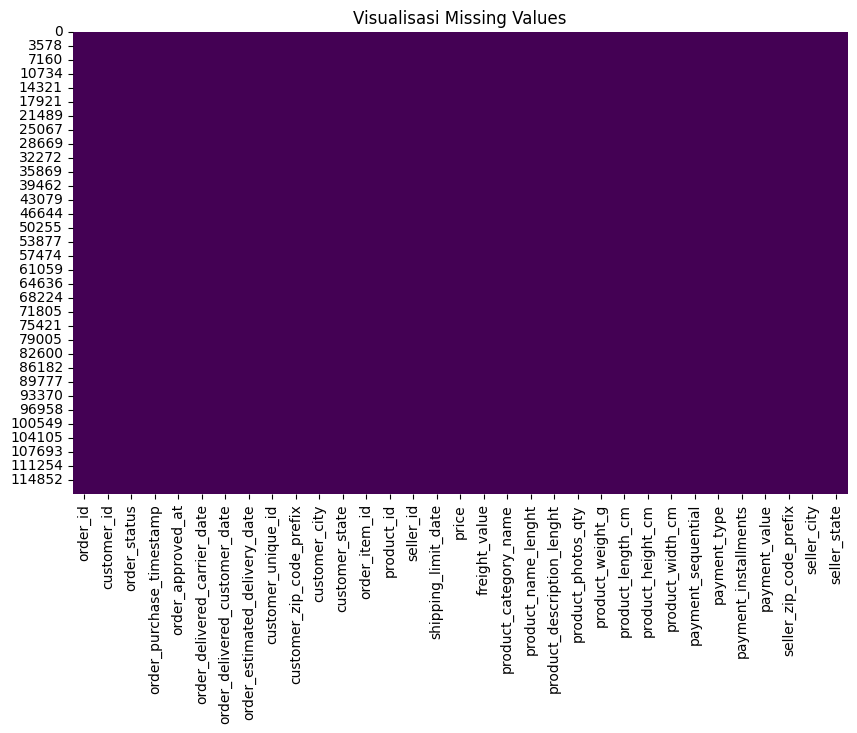

In [113]:
# Visualisasi missing values menggunakan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(main_data.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values')
plt.show()

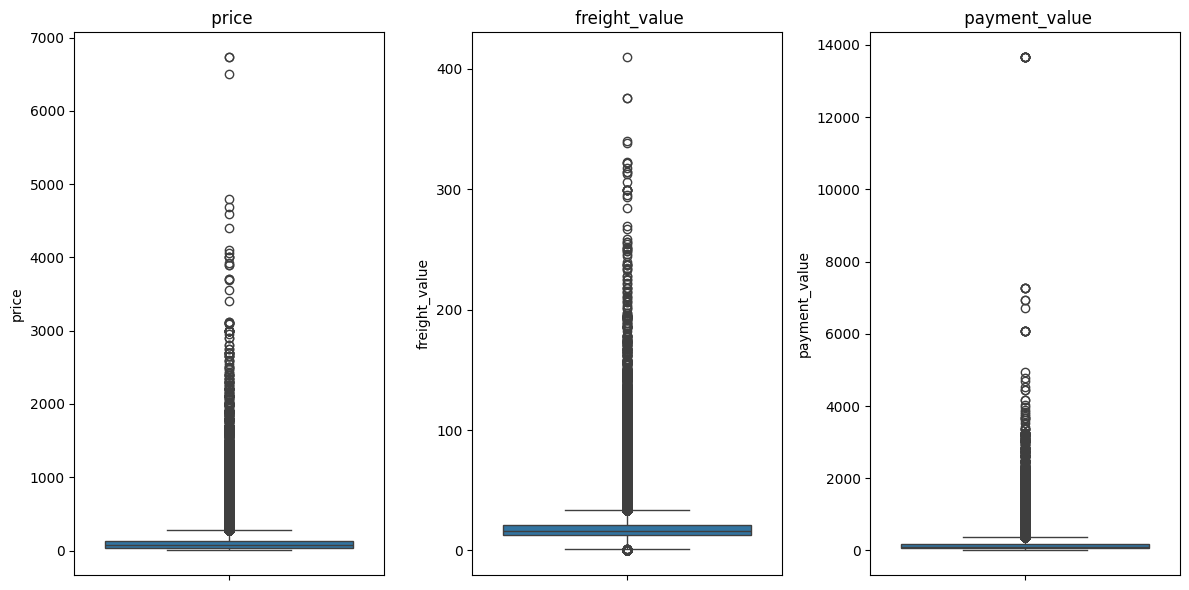

In [114]:
# Cek outlier untuk kolom numerik (price, freight_value, payment_value)
numeric_columns = ['price', 'freight_value', 'payment_value']

plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=main_data[column])
    plt.title(f' {column}')
plt.tight_layout()
plt.show()

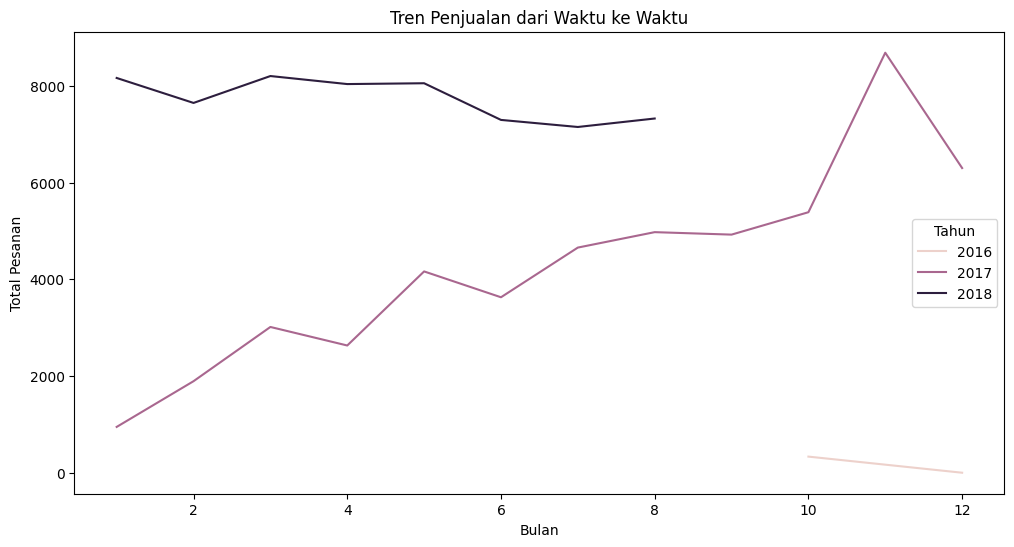

In [115]:
# Konversi kolom order_purchase_timestamp ke datetime
main_data['order_purchase_timestamp'] = pd.to_datetime(main_data['order_purchase_timestamp'])

# Ekstrak tahun dan bulan dari timestamp
main_data['purchase_year'] = main_data['order_purchase_timestamp'].dt.year
main_data['purchase_month'] = main_data['order_purchase_timestamp'].dt.month

# Agregasi data penjualan per bulan
monthly_sales = main_data.groupby(['purchase_year', 'purchase_month']).size().reset_index(name='total_orders')

# Plot tren penjualan
plt.figure(figsize=(12, 6))
sns.lineplot(x='purchase_month', y='total_orders', hue='purchase_year', data=monthly_sales)
plt.title('Tren Penjualan dari Waktu ke Waktu')
plt.xlabel('Bulan')
plt.ylabel('Total Pesanan')
plt.legend(title='Tahun')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_43384\1751216070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='total_customers', data=customer_by_state, palette='crest')


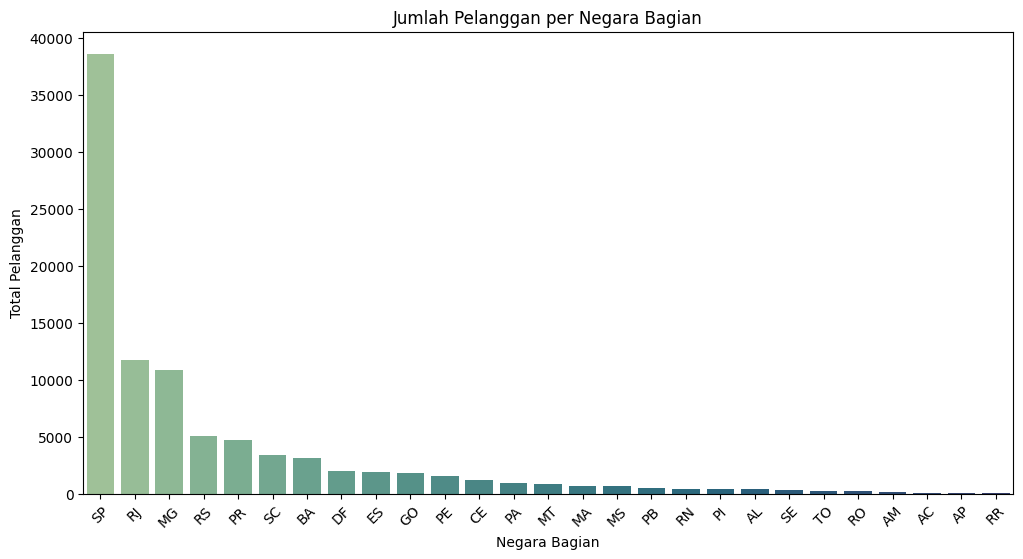

In [116]:
# Hitung jumlah pelanggan unik per negara bagian
customer_by_state = main_data.groupby('customer_state')['customer_unique_id'].nunique().reset_index(name='total_customers')

# Urutkan berdasarkan jumlah pelanggan
customer_by_state = customer_by_state.sort_values(by='total_customers', ascending=False)

# Plot jumlah pelanggan per negara bagian
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='total_customers', data=customer_by_state, palette='crest')
plt.title('Jumlah Pelanggan per Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Total Pelanggan')
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_43384\2133784266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='total_customers', data=customer_by_city, palette='crest')


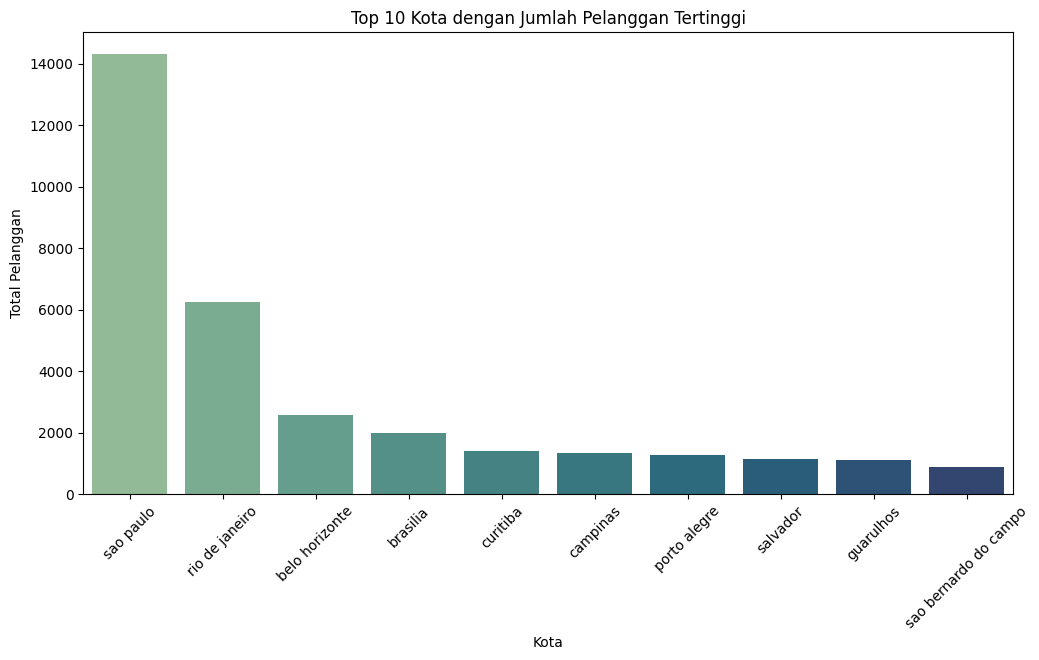

In [117]:
# Hitung jumlah pelanggan unik per kota
customer_by_city = main_data.groupby('customer_city')['customer_unique_id'].nunique().reset_index(name='total_customers')

# Urutkan dan ambil top 10 kota
customer_by_city = customer_by_city.sort_values(by='total_customers', ascending=False).head(10)

# Plot jumlah pelanggan per kota
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='total_customers', data=customer_by_city, palette='crest')
plt.title('Top 10 Kota dengan Jumlah Pelanggan Tertinggi')
plt.xlabel('Kota')
plt.ylabel('Total Pelanggan')
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_43384\760236331.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name', y='total_orders', data=product_sales, palette='crest')


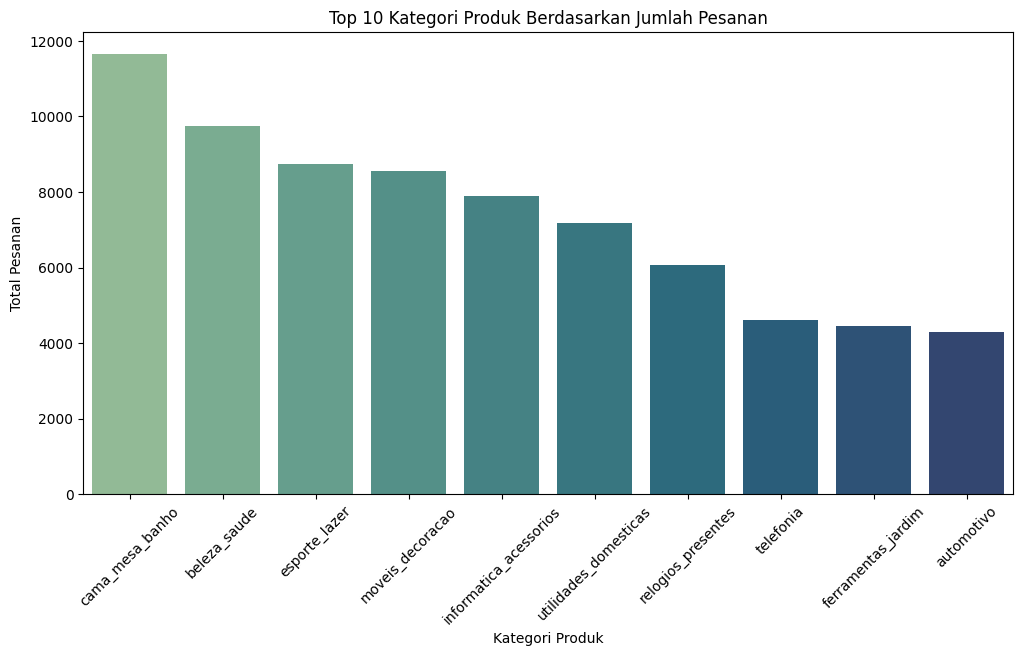

In [118]:
# Hitung jumlah pesanan per kategori produk
product_sales = main_data.groupby('product_category_name').size().reset_index(name='total_orders')

# Urutkan dan ambil top 10 kategori
product_sales = product_sales.sort_values(by='total_orders', ascending=False).head(10)

# Plot jumlah pesanan per kategori produk
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name', y='total_orders', data=product_sales, palette='crest')
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Pesanan')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pesanan')
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_43384\3247953005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name', y='total_revenue', data=category_revenue, palette='crest')


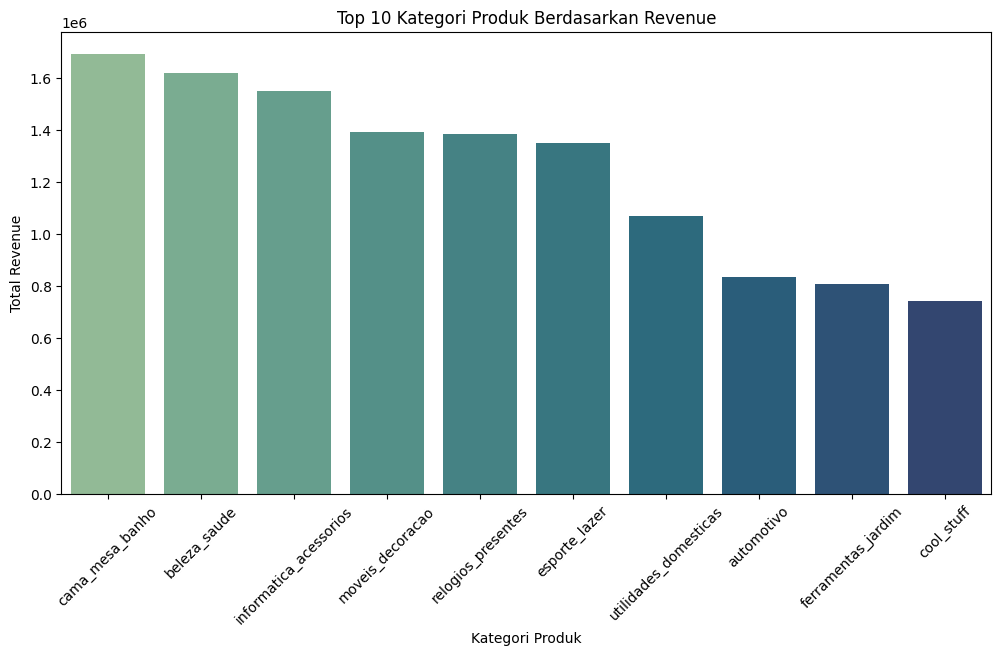

In [119]:
# Hitung total revenue per kategori produk
category_revenue = main_data.groupby('product_category_name')['payment_value'].sum().reset_index(name='total_revenue')

# Urutkan dan ambil top 10 kategori
category_revenue = category_revenue.sort_values(by='total_revenue', ascending=False).head(10)

# Plot total revenue per kategori produk
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name', y='total_revenue', data=category_revenue, palette='crest')
plt.title('Top 10 Kategori Produk Berdasarkan Revenue')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

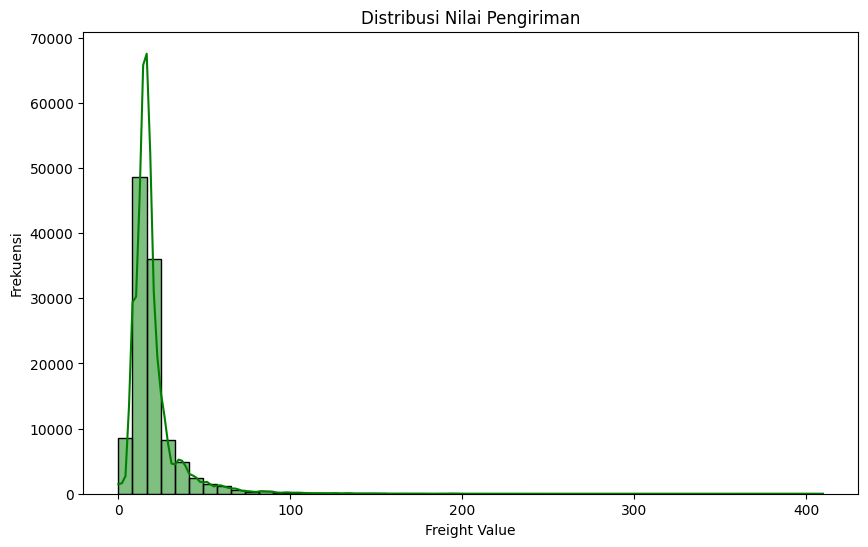

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(main_data['freight_value'], bins=50, kde=True, color='green')
plt.title('Distribusi Nilai Pengiriman')
plt.xlabel('Freight Value')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_43384\364548142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_distribution.index, y=order_status_distribution.values, palette='crest')


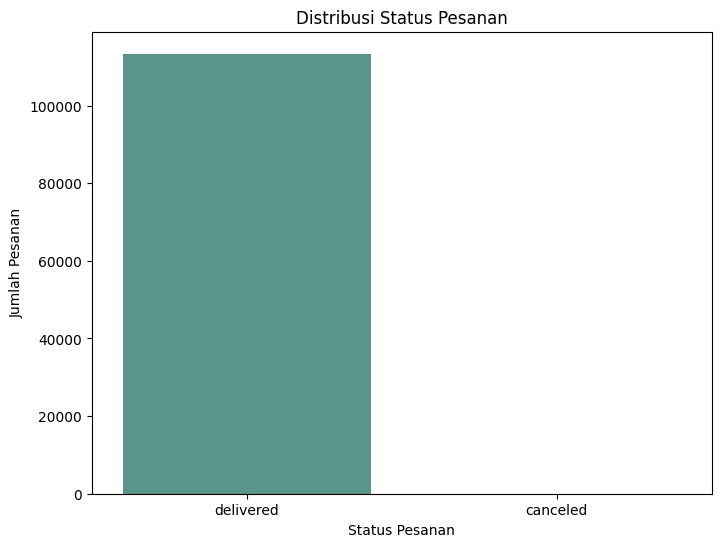

In [132]:
order_status_distribution = main_data['order_status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=order_status_distribution.index, y=order_status_distribution.values, palette='crest')
plt.title('Distribusi Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.show()

Rata-rata harga produk: 120.18


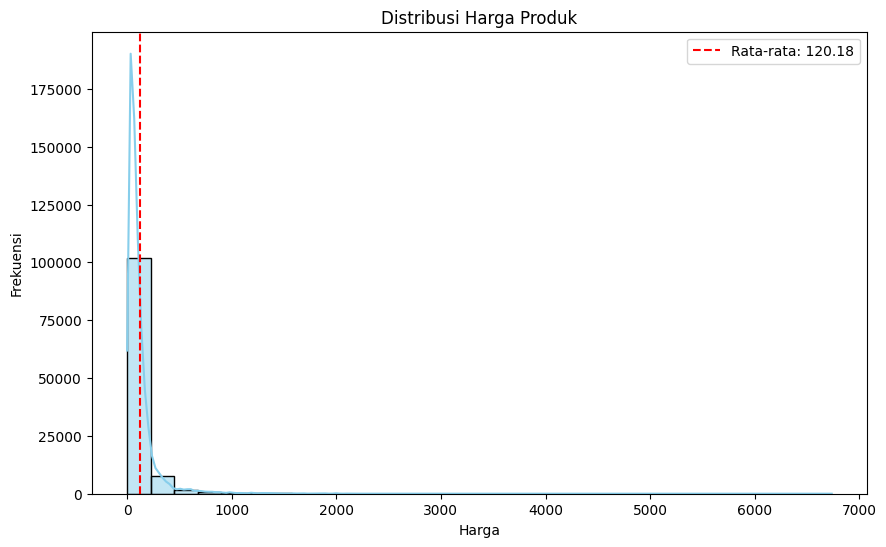

In [122]:
# Hitung rata-rata harga produk
average_price = main_data['price'].mean()
print(f"Rata-rata harga produk: {average_price:.2f}")

# Visualisasi distribusi harga produk
plt.figure(figsize=(10, 6))
sns.histplot(main_data['price'], bins=30, kde=True, color='skyblue')
plt.axvline(average_price, color='red', linestyle='--', label=f'Rata-rata: {average_price:.2f}')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

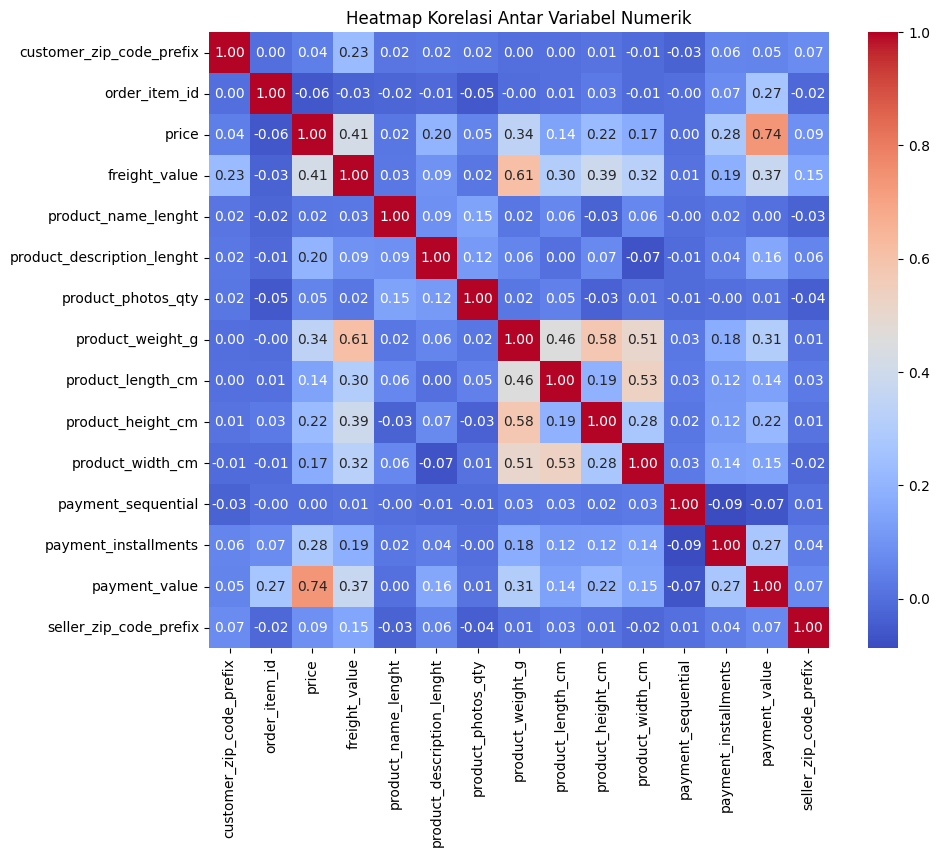

In [123]:
# Pilih kolom numerik
numeric_columns = [
    'customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'payment_sequential', 'payment_installments', 'payment_value',
    'seller_zip_code_prefix'
]

# Hitung matriks korelasi
correlation_matrix = main_data[numeric_columns].corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk mana yang paling laris (distribusi tertinggi), dan bagaimana hal ini mencerminkan kebutuhan pelanggan?


C:\Users\USER\AppData\Local\Temp\ipykernel_43384\3830938213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.head(10).values, y=category_distribution.head(10).index, palette='crest')


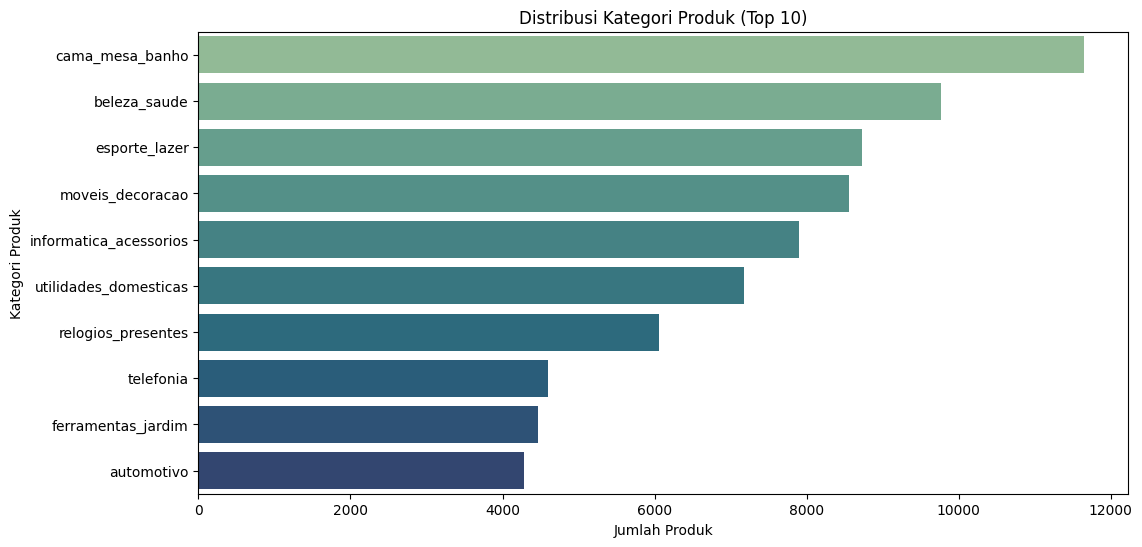

In [124]:
# Hitung distribusi kategori produk
category_distribution = main_data['product_category_name'].value_counts()

# Visualisasi distribusi kategori produk (top 10 kategori)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.head(10).values, y=category_distribution.head(10).index, palette='crest')
plt.title('Distribusi Kategori Produk (Top 10)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Produk')
plt.show()

### Distribusi Kategori Produk

Berdasarkan visualisasi tersebut, kategori produk dengan jumlah produk terbanyak adalah "cama_mesa_banho" (tempat tidur, meja, dan kamar mandi) hal ini bisa dikaitkan dengan gaya hidup masyarakat Brazil yang memperhatikan kenyamanan rumah, kategori ini memiliki jumlah produk tertinggi dibandingkan dengan kategori lainnya. Kategori berikutnya yang juga memiliki jumlah produk yang cukup tinggi adalah "beleza_saude" (kecantikan dan kesehatan), "esporte_lazer" (olahraga dan rekreasi), serta "moveis_decoracao" (perabotan dan dekorasi rumah). Ini menunjukkan bahwa produk-produk dalam kategori ini memiliki permintaan yang tinggi dan kemungkinan besar menjadi yang paling laris di marketplace.

### Pertanyaan 2: Bagaimana tren penjualan dari waktu ke waktu? Apakah ada musiman atau pola tertentu?

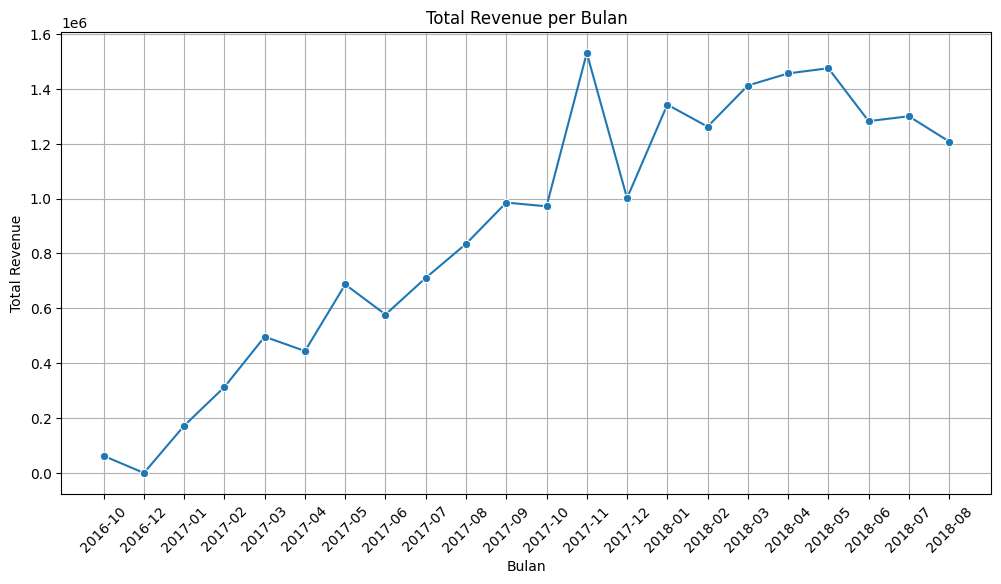

In [125]:
# Ekstrak bulan dari order_purchase_timestamp
main_data['order_purchase_month'] = pd.to_datetime(main_data['order_purchase_timestamp']).dt.to_period('M')

# Groupby bulan dan hitung total revenue
total_revenue_by_month = main_data.groupby('order_purchase_month')['payment_value'].sum().reset_index()

# Konversi ke string
total_revenue_by_month['order_purchase_month'] = total_revenue_by_month['order_purchase_month'].astype(str)

# Plot tren revenue bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_purchase_month', y='payment_value', data=total_revenue_by_month, marker='o')
plt.title('Total Revenue per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_43384\774952618.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_purchase_month_only', y='total_orders', data=seasonal_sales, palette='crest')


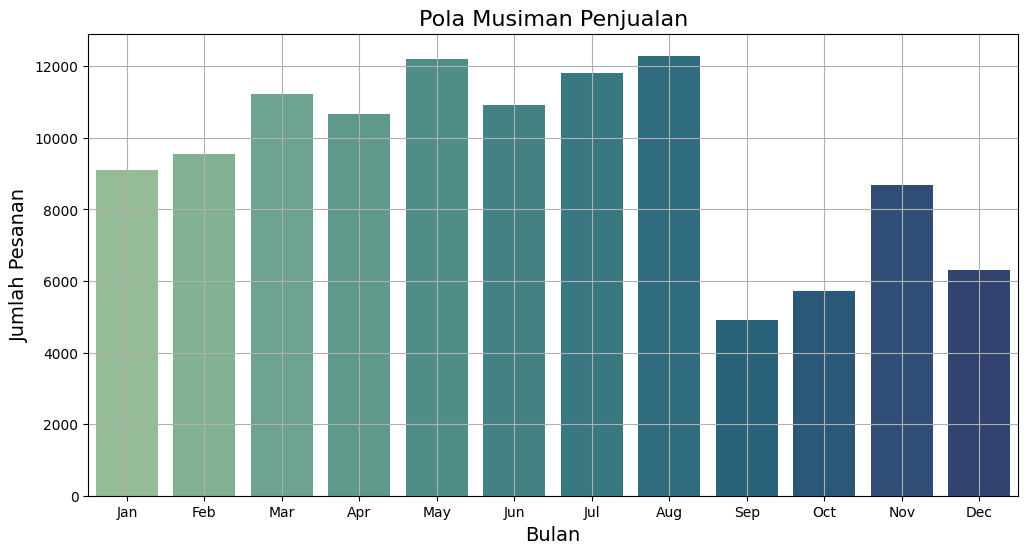

In [126]:
# Konversi kolom order_purchase_timestamp ke datetime
main_data['order_purchase_timestamp'] = pd.to_datetime(main_data['order_purchase_timestamp'])

# Ekstrak bulan saja (tanpa tahun)
main_data['order_purchase_month_only'] = main_data['order_purchase_timestamp'].dt.month

# Groupby bulan dan hitung jumlah pesanan
seasonal_sales = main_data.groupby('order_purchase_month_only').size().reset_index(name='total_orders')

# Plot pola musiman
plt.figure(figsize=(12, 6))
sns.barplot(x='order_purchase_month_only', y='total_orders', data=seasonal_sales, palette='crest')
plt.title('Pola Musiman Penjualan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Analisis Jumlah Pesanan dan Revenue Per Bulan 

Penjualan mengalami lonjakan pada bulan Mei, Juli, dan Agustus, yang mungkin berhubungan dengan perayaan dan liburan tertentu di Brazil. Misalnya:

- Mei: Bertepatan dengan Hari Ibu (Día das Mães), yang biasanya mendorong penjualan produk hadiah seperti kecantikan, perabotan, dan dekorasi rumah.
- Juli - Agustus: Liburan musim dingin di beberapa bagian Brazil, yang dapat meningkatkan pembelian untuk kebutuhan rumah, hiburan, dan kesehatan.
Sementara itu, penurunan penjualan pada September dan Oktober bisa mencerminkan periode setelah liburan, di mana konsumen mulai mengurangi pengeluaran. Namun, peningkatan kembali pada November dan Desember dapat dikaitkan dengan Black Friday dan Natal, dua momen belanja terbesar di Brazil yang mendorong peningkatan transaksi secara signifikan.


### Pertanyaan 3:  Wilayah mana yang memiliki distribusi customer tertinggi?

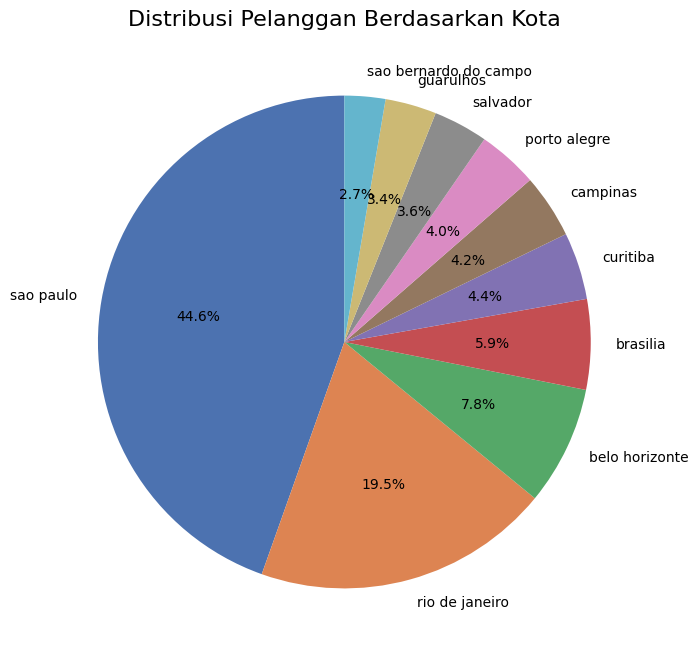

In [127]:
# Hitung persentase pelanggan berdasarkan kota
city_distribution = main_data['customer_city'].value_counts(normalize=True).head(10) * 100

# Visualisasi pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_distribution, 
        labels=city_distribution.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('deep'), 
        textprops={'rotation': 0})

plt.title('Distribusi Pelanggan Berdasarkan Kota', fontsize=16)
plt.show()


### Distribusi Pelanggan Berdasarkan Kota

Dari pie chart distribusi pelanggan berdasarkan kota, terlihat bahwa tiga kota dengan kontribusi penjualan tertinggi adalah:

- **São Paulo**: 44.6%
- **Rio de Janeiro**: 19.5%
- **Belo Horizonte**: 7.8%

Dari diagram pie "Distribusi Pelanggan Berdasarkan Kota", terlihat bahwa Sao Paulo memiliki kontribusi pelanggan tertinggi dengan 44.6%. Ini wajar karena Sao Paulo adalah kota terbesar di Brasil dan pusat ekonomi utama, sehingga banyak transaksi e-commerce berasal dari san


### Pertanyaan 4: Metode pembayaran apa yang paling populer?

C:\Users\USER\AppData\Local\Temp\ipykernel_43384\2115176180.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='count', data=payment_frequency, palette='crest')


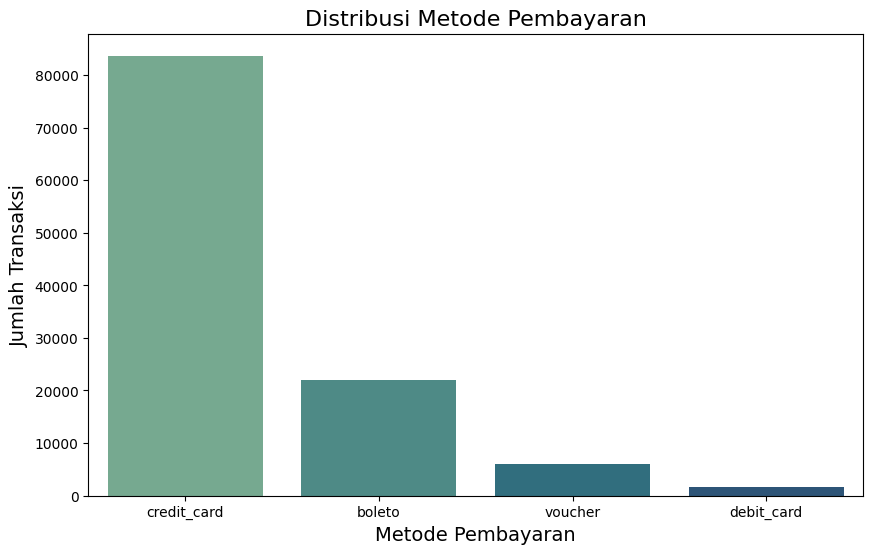

In [128]:
# Hitung frekuensi metode pembayaran
payment_frequency = main_data['payment_type'].value_counts().reset_index()
payment_frequency.columns = ['payment_type', 'count']

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='count', data=payment_frequency, palette='crest')
plt.title('Distribusi Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14) 
plt.show()

### Distribusi Metode Pembayaran

Dari bar chart distribusi metode pembayaran, dapat disimpulkan bahwa:
- **Credit Card** adalah metode pembayaran paling populer dengan jumlah transaksi tertinggi.
- **Boleto** berada di posisi kedua, meskipun jumlahnya jauh lebih sedikit dibandingkan kartu kredit.
- **Voucher** dan **Debit Card** memiliki jumlah transaksi yang lebih rendah.

Grafik tersebut menunjukkan bahwa kartu kredit (credit_card) adalah metode pembayaran yang paling dominan, jauh lebih tinggi dibandingkan metode lainnya seperti boleto (sistem pembayaran berbasis voucher yang umum di Brasil), voucher, dan kartu debit (debit_card). Ini mencerminkan kebiasaan masyarakat Brasil yang cenderung menggunakan kartu kredit untuk pembelian online.


### Pertanyaan 5: Produk apa yang memiliki revenue tertinggi?

C:\Users\USER\AppData\Local\Temp\ipykernel_43384\2461858303.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='product_category_name', data=revenue_by_category.head(10), palette='crest')


     product_category_name  payment_value
13         cama_mesa_banho     1692557.09
11            beleza_saude     1620868.35
44  informatica_acessorios     1549252.47
54        moveis_decoracao     1393972.04
66      relogios_presentes     1387046.31
32           esporte_lazer     1349194.08
72   utilidades_domesticas     1069787.97
8               automotivo      833610.84
40      ferramentas_jardim      810460.70
26              cool_stuff      744339.94


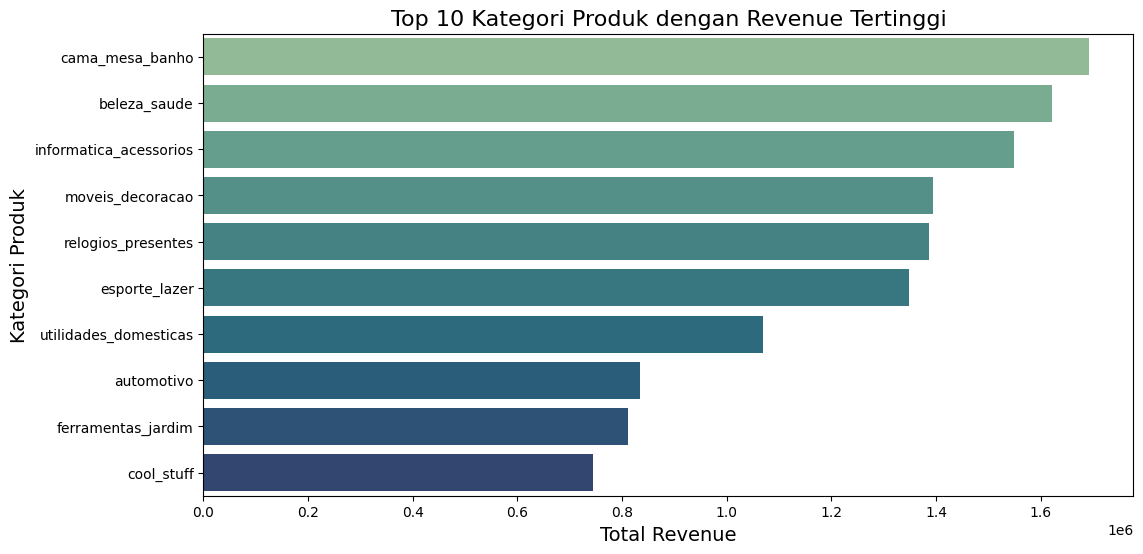

In [129]:
# Groupby kategori produk dan hitung total revenue
revenue_by_category = main_data.groupby('product_category_name')['payment_value'].sum().reset_index()

# Urutkan berdasarkan revenue tertinggi
revenue_by_category = revenue_by_category.sort_values(by='payment_value', ascending=False)

# Tampilkan top 10 kategori dengan revenue tertinggi
print(revenue_by_category.head(10))

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_value', y='product_category_name', data=revenue_by_category.head(10), palette='crest')
plt.title('Top 10 Kategori Produk dengan Revenue Tertinggi', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.show()

### Top 10 Kategori Produk dengan Revenue Tertinggi

Dari horizontal bar chart top 10 kategori produk dengan revenue tertinggi, kategori yang mendominasi adalah:
1. **Cama, Mesa, Banho** (Peralatan Tidur, Meja, dan Kamar Mandi)
2. **Beleza & Saúde** (Kecantikan & Kesehatan)
3. **Informática & Acessórios** (Perangkat Komputer & Aksesori)

Ini menunjukkan bahwa produk kebutuhan rumah tangga, kecantikan, dan teknologi memiliki permintaan tinggi di marketplace ini.



## Analisis Lanjutan dengan Geospatial Analysis

### Geospatial Analysis untuk pertanyaan ketiga

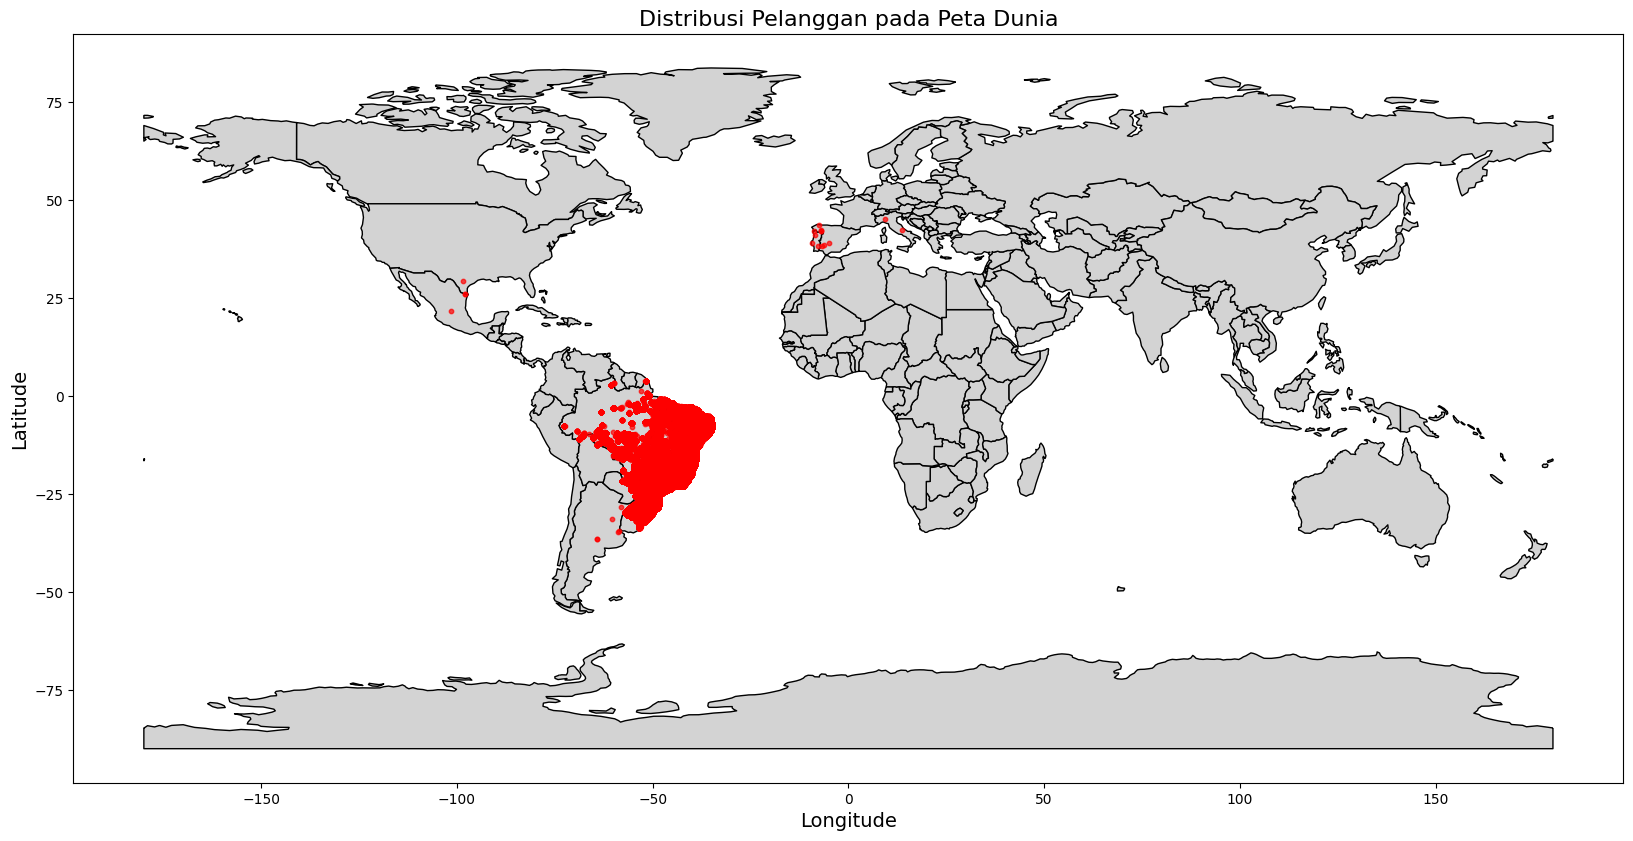

In [130]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load dataset geolokasi
geolocation_data = pd.read_csv('geolocation_dataset.csv')

# Gabungkan geolocation_data dengan customers_data berdasarkan customer_zip_code_prefix
merged_data = pd.merge(
    customers,
    geolocation_data,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Hitung jumlah pelanggan per kota
customer_distribution = merged_data.groupby('customer_city')['customer_unique_id'].nunique().reset_index()

# Gabungkan dengan data geolokasi untuk mendapatkan latitude dan longitude
geolocation_data_city = merged_data[['customer_city', 'geolocation_lat', 'geolocation_lng']].drop_duplicates()
customer_distribution = pd.merge(customer_distribution, geolocation_data_city, on='customer_city')

# Buat GeoDataFrame
gdf = gpd.GeoDataFrame(
    customer_distribution,
    geometry=gpd.points_from_xy(customer_distribution['geolocation_lng'], customer_distribution['geolocation_lat'])
)

# Proyeksi peta dunia
world = gpd.read_file('ne_110m_admin_0_countries.shp').to_crs(epsg=4326)

# Plot peta
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Tambahkan titik pelanggan
ax.scatter(gdf['geolocation_lng'], gdf['geolocation_lat'], color='red', s=10, alpha=0.7)

plt.title('Distribusi Pelanggan pada Peta Dunia', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

### Konsentrasi Pelanggan Berdasarkan Wilayah

#### **1. Konsentrasi Pelanggan Tertinggi**
**Wilayah dengan Kepadatan Pelanggan Tinggi**  
Titik-titik merah yang padat menunjukkan wilayah dengan konsentrasi pelanggan tertinggi.  
- **Brasil**: Kota-kota besar seperti São Paulo, Rio de Janeiro, dan Belo Horizonte memiliki kepadatan pelanggan yang sangat tinggi.  
- **Amerika Serikat**: Wilayah metropolitan seperti New York atau Los Angeles juga menunjukkan konsentrasi pelanggan yang tinggi.

**Insight**  
- Wilayah-wilayah ini adalah pasar utama untuk bisnis e-commerce.
- Strategi pemasaran dan logistik dapat difokuskan pada wilayah ini untuk memaksimalkan penjualan.

---

#### **2. Wilayah dengan Pelanggan Sedang**
**Wilayah dengan Kepadatan Pelanggan Sedang**  
Titik-titik merah yang tidak terlalu padat menunjukkan wilayah dengan konsentrasi pelanggan sedang.  
- **Eropa**: Kota seperti Madrid, Paris, atau Berlin.  
- **Asia**: Wilayah metropolitan seperti Tokyo atau Seoul.

**Insight**  
- Wilayah-wilayah ini memiliki potensi untuk ditingkatkan penjualannya dengan expandsi pemasaran dan logistik ke manca negara.

---

#### **3. Wilayah dengan Pelanggan Rendah**
**Wilayah dengan Kepadatan Pelanggan Rendah**  
Titik-titik merah yang jarang atau tidak ada menunjukkan wilayah dengan konsentrasi pelanggan rendah.  
- **Afrika, Asia Tengah, atau Amerika Selatan (selain Brasil)**: Beberapa wilayah di sini memiliki kepadatan pelanggan yang rendah.

**Insight**  
- Wilayah-wilayah ini mungkin belum terjangkau oleh bisnis e-commerce.  


## Conclusion

#### **Pertanyaan 1: Produk mana yang paling laris (distribusi tertinggi), dan bagaimana hal ini mencerminkan kebutuhan pelanggan?**

1. **Kategori "cama_mesa_banho"**  
   Kategori ini menjadi yang paling laris. Hal ini mencerminkan kebutuhan dasar rumah tangga di Brasil yang tinggi, terutama untuk perabotan dan tekstil rumah. Permintaan yang stabil menunjukkan potensi pasar yang besar dalam kategori ini.

2. **Kategori "beleza_saude"**  
   Produk dalam kategori kecantikan dan kesehatan juga memiliki permintaan tinggi. Tren global yang mendorong kesadaran masyarakat terhadap perawatan diri turut berkontribusi terhadap popularitas kategori ini.

3. **Kategori "esporte_lazer"**  
   Kategori olahraga dan rekreasi juga cukup laris, yang kemungkinan disebabkan oleh meningkatnya kesadaran masyarakat Brasil terhadap gaya hidup sehat dan aktivitas outdoor. Hal ini menunjukkan peluang bisnis pada produk yang mendukung kesehatan dan kebugaran.

Fokus pada kategori **"cama_mesa_banho"**, **"beleza_saude"**, dan **"informatica_acessorios"** karena memiliki permintaan dan revenue yang tinggi. Ketiga kategori ini menunjukkan potensi besar dalam mendukung pertumbuhan bisnis.

---

#### **Pertanyaan 2: Bagaimana tren penjualan dari waktu ke waktu? Apakah ada musiman atau pola tertentu?**
1. **Pola Musiman**
   - Ada pola musiman yang terlihat jelas dalam jumlah pesanan. Peningkatan signifikan terjadi dari **Maret hingga Agustus**, diikuti oleh penurunan drastis setelah **September hingga Oktober**, dan sedikit kenaikan kembali pada **November dan Desember**.

2. **Puncak Penjualan**
   - Penjualan mencapai puncaknya pada **Mei, Juni, dan Agustus**, yang kemungkinan besar bertepatan dengan musim liburan atau periode belanja khusus di Brasil.

3. **Penurunan Setelah Puncak**
   - Setelah bulan **Agustus**, terjadi penurunan tajam, terutama pada **September dan Oktober**. Penurunan ini mungkin disebabkan oleh periode setelah musim liburan di mana pelanggan mengurangi pengeluaran.

4. **Tren Revenue**
   - Revenue per bulan menunjukkan tren pertumbuhan secara keseluruhan. Namun, terdapat lonjakan besar pada beberapa bulan tertentu, yang mungkin diakibatkan oleh event belanja seperti **Black Friday** atau promosi besar lainnya.

5. **Strategi Bisnis yang Direkomendasikan**  
    Manfaatkan periode puncak penjualan dari Maret hingga Agustus dengan strategi pemasaran intensif. Selain itu, rancang strategi pemasaran khusus selama periode penurunan (September-Oktober) untuk menjaga kestabilan pendapatan.

---

#### **Pertanyaan 3:  Wilayah mana yang memiliki distribusi customer tertinggi**
1. **São Paulo**  
   Sebagai kota terbesar di Brazil dengan populasi dan aktivitas ekonomi yang tinggi, São Paulo mendominasi kontribusi penjualan. Kota ini menjadi pasar utama yang menawarkan peluang besar untuk pengembangan bisnis.

2. **Rio de Janeiro**  
   Sebagai kota metropolitan dengan banyaknya kelas menengah dan atas, Rio de Janeiro memberikan kontribusi penjualan yang signifikan. Konsumen di kota ini mungkin lebih responsif terhadap produk premium dan kampanye promosi.

3. **Belo Horizonte**  
   Perekonomian kota ini yang berbasis industri dan perdagangan turut menyumbang penjualan yang cukup besar. Kota ini juga memiliki potensi untuk peningkatan penjualan melalui strategi pemasaran yang tepat.
4. **Strategi Bisnis yang Direkomendasikan**  
- Fokuskan upaya pada kota-kota besar seperti **São Paulo** dan **Rio de Janeiro**, yang memiliki konsentrasi pelanggan tertinggi.
- Pertimbangkan ekspansi ke kota-kota dengan **potensi pertumbuhan**, untuk menjangkau pasar yang belum tergarap.

---

#### **Pertanyaan 4. Metode Pembayaran yang paling populer**
1. **Dominasi Penggunaan Kartu Kredit**  
   Penggunaan kartu kredit yang dominan menunjukkan bahwa mayoritas pelanggan lebih nyaman menggunakan metode pembayaran digital. Ini memberikan wawasan bahwa infrastruktur pembayaran digital memainkan peran penting dalam kemudahan transaksi.

2. **Popularitas Boleto**  
   Sebagai sistem pembayaran berbasis invoice yang populer di Brazil, Boleto tetap digunakan meskipun jumlahnya lebih sedikit dibandingkan kartu kredit. Hal ini menunjukkan bahwa sebagian pelanggan masih memilih metode tradisional.

3. **Potensi Peningkatan untuk Voucher dan Debit Card**  
   Dengan jumlah transaksi yang relatif rendah, metode pembayaran seperti voucher dan debit card dapat ditingkatkan adopsinya. Salah satu strateginya adalah menawarkan insentif seperti diskon atau cashback bagi pengguna metode ini untuk mendorong minat pelanggan.

4. **Strategi Bisnis yang Direkomendasikan**  
   - Fokus pada penyempurnaan proses pembayaran digital untuk memaksimalkan pengalaman pelanggan yang menggunakan kartu kredit.  
   - Buat promosi khusus untuk mendorong penggunaan metode pembayaran dengan transaksi rendah, sehingga memperluas adopsi metode pembayaran alternatif.

---

#### **Pertanyaan 5. Revenue Tertinggi**
1. **Produk Rumah Tangga**  
   Kategori **Cama, Mesa, Banho** menjadi kategori dengan pendapatan tertinggi, menunjukkan permintaan tinggi untuk produk kebutuhan sehari-hari. Hal ini dapat mencerminkan kebutuhan konsumen terhadap perlengkapan rumah tangga di Brasil.

2. **Produk Kecantikan dan Kesehatan**  
   Produk dalam kategori **Beleza & Saúde** menunjukkan tren konsumsi yang stabil. Peningkatan kesadaran masyarakat terhadap self-care kemungkinan besar menjadi faktor utama tingginya permintaan dalam kategori ini.

3. **Produk Teknologi**  
   Kategori **Informática & Acessórios** memiliki permintaan tinggi, yang berkaitan dengan meningkatnya kebutuhan akan perangkat elektronik dan aksesori di era digital. Hal ini mencerminkan pertumbuhan penetrasi teknologi di pasar.

4. **Strategi Bisnis yang Direkomendasikan**  
- Pertahankan fokus pada **produk rumah tangga** dan **kebutuhan sehari-hari** yang memiliki kontribusi revenue tertinggi.
- Tingkatkan penjualan pada **produk teknologi** untuk memanfaatkan potensi pertumbuhan di era digital.


In [131]:
main_data.to_csv("all_data.csv", index=False)